In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\serez\Downloads/russian_demography.csv')

In [6]:
data

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [ ]:
У нас есть такие колонки, как год, регионы, естественный прирост населения (npg - natural population growth, by 1000 people), 
уровень рождения, уровень смертности, общий демографический вес (gdw - general demographic weight), и урбанизация.
Внедрим также новую колонку разности уровня рождения от уровня смертности.

In [8]:
data['rate_diff'] = data['birth_rate'] - data['death_rate']


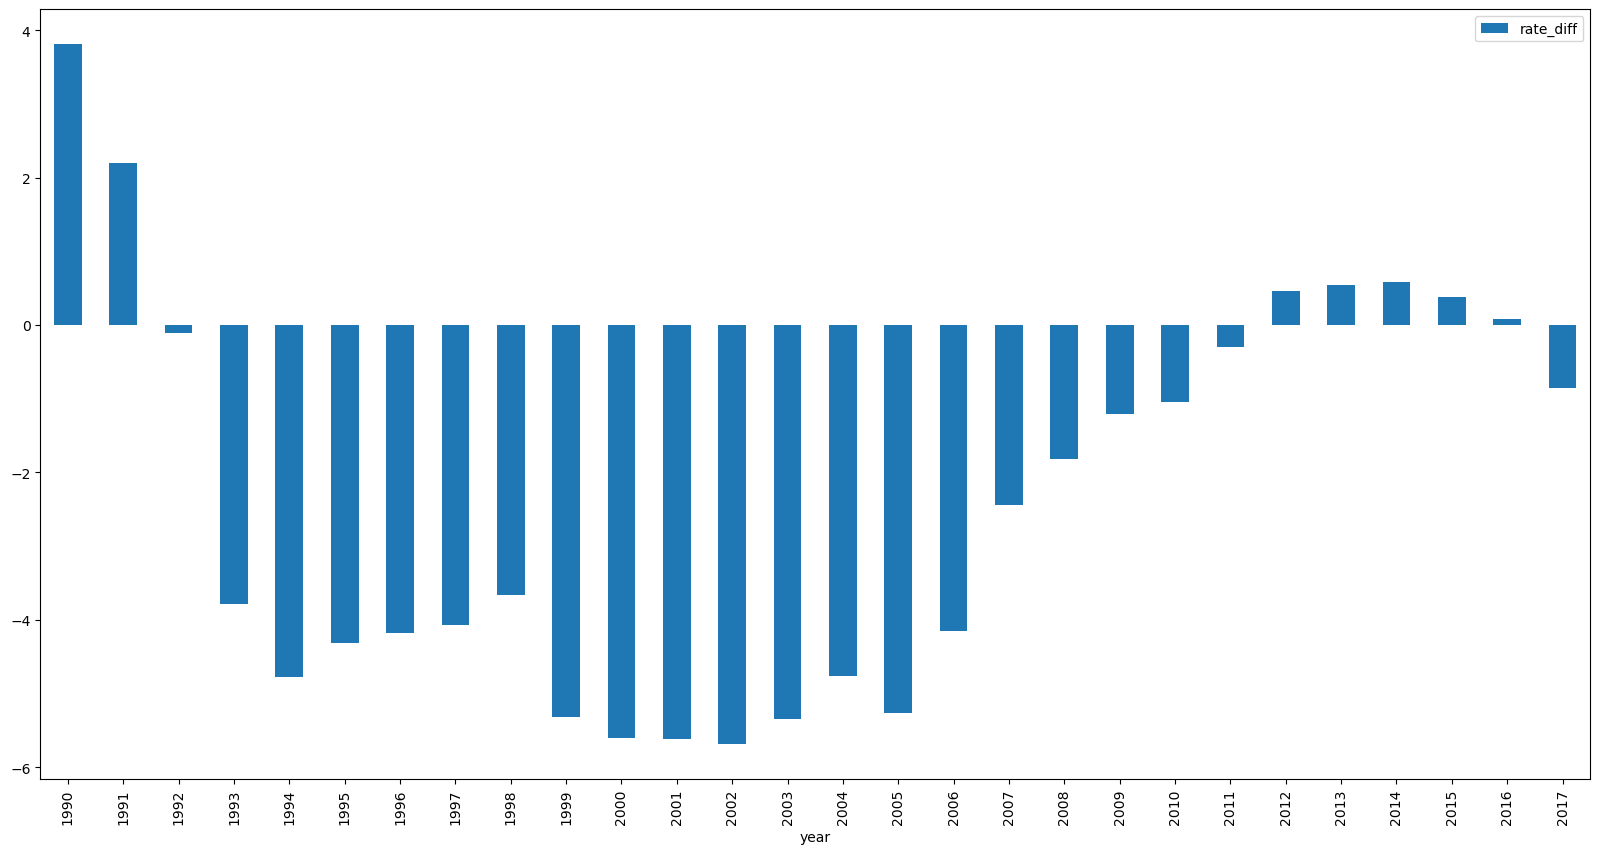

In [9]:
data.groupby(['year']).agg({'rate_diff':'mean'}).plot.bar(figsize=(20,10))
plt.show()

In [ ]:
Видим, что после распада СССР Россия всегда испытывала естественную убыль населения (исключая фактор миграции)

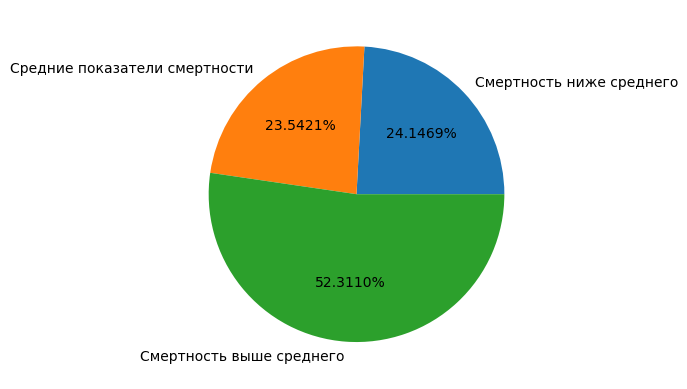

In [13]:
below_average_df=data[(data['death_rate']<12)]
average_df=data[(data['death_rate']>=12)&(data['death_rate']<14)] #+-1
above_average_df=data[(data['death_rate']>=14)]

#распроделяем регионы на три группы по уровню смертности

part1=len(below_average_df.index)
part2=len(average_df.index)
part3=len(above_average_df.index)

#делим будущую диаграмму на части

values = [part1,part2,part3]
labels = ['Смертность ниже среднего','Средние показатели смертности','Смертность выше среднего']
plt.pie(values, labels=labels, autopct='%1.4f%%');
plt.show()


In [ ]:
Как видим, у большинства регионов большую часть времени смертность выше среднего (>50%)

In [17]:
dataTopBirth = data.groupby(['region']).agg({'birth_rate':'mean','death_rate':'mean'}).sort_values(by="birth_rate", ascending=False).head(10                                                                                                                                         )
dataTopDeatch = data.groupby(['region']).agg({'birth_rate':'mean','death_rate':'mean'}).sort_values(by="death_rate", ascending=False).head(10)


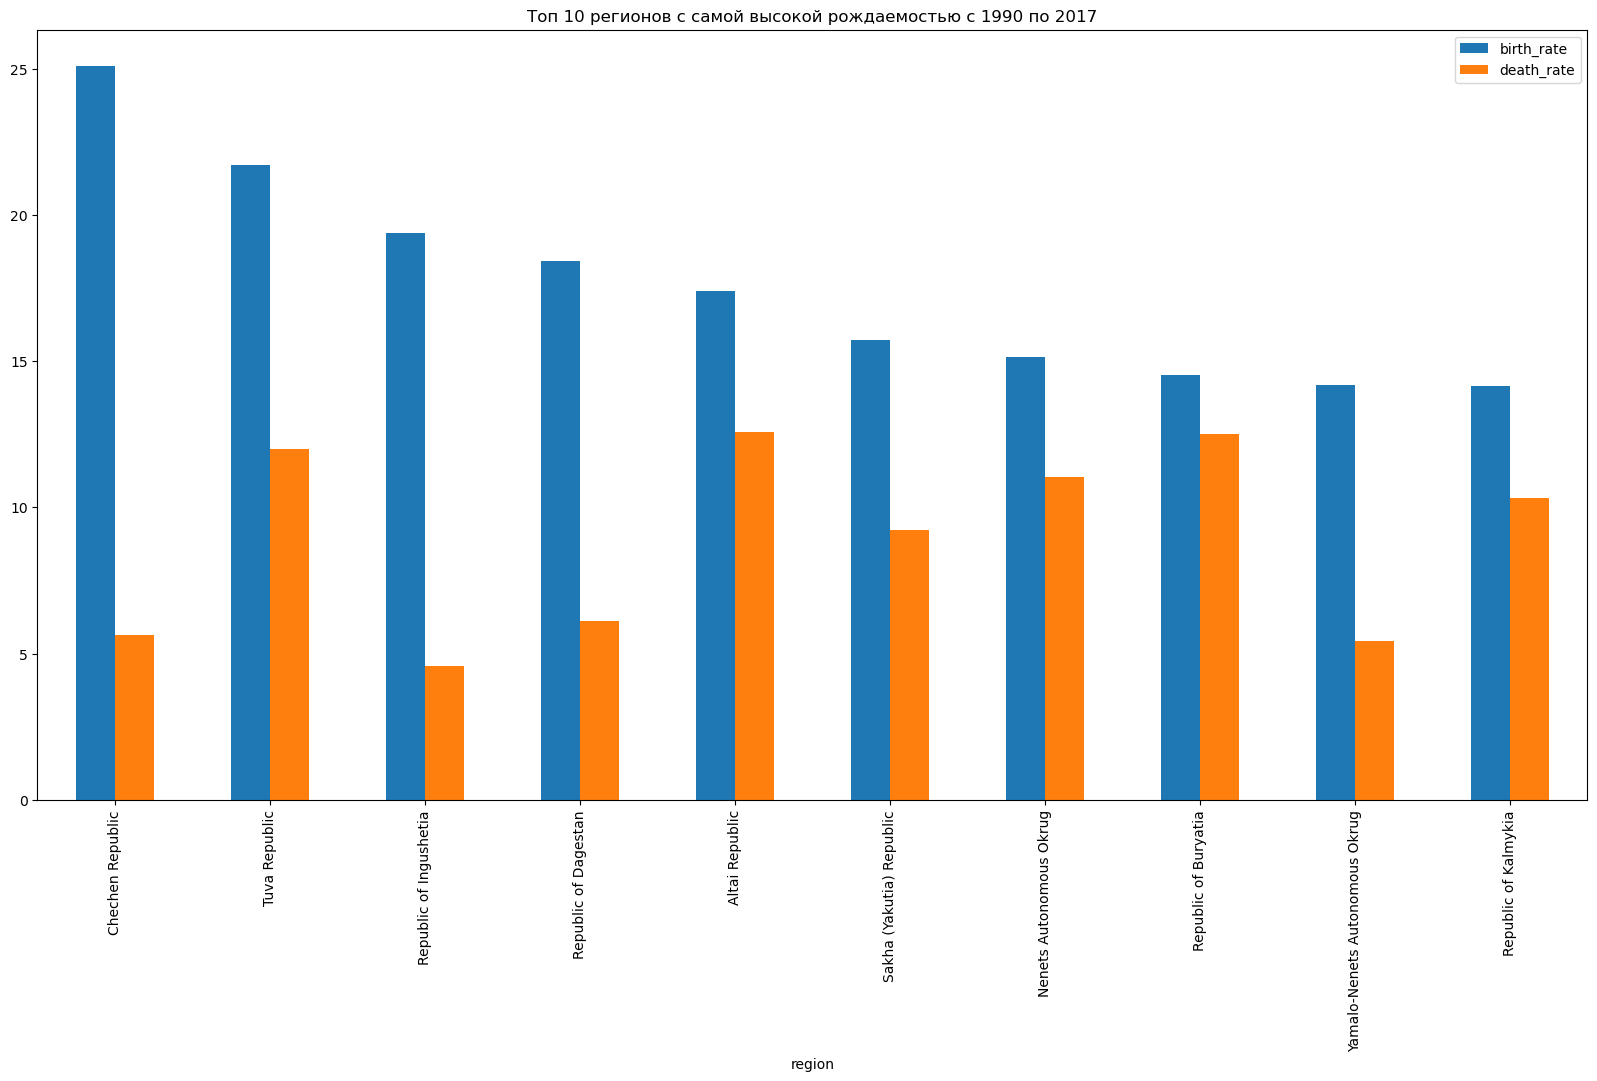

In [16]:
dataTopBirth.plot.bar(figsize=(20,10),title='Топ 10 регионов с самой высокой рождаемостью с 1990 по 2017')
plt.show()


<AxesSubplot:title={'center':'Топ 10 регионов с самой высокой смертностью с 1990 по 2017'}, xlabel='region'>

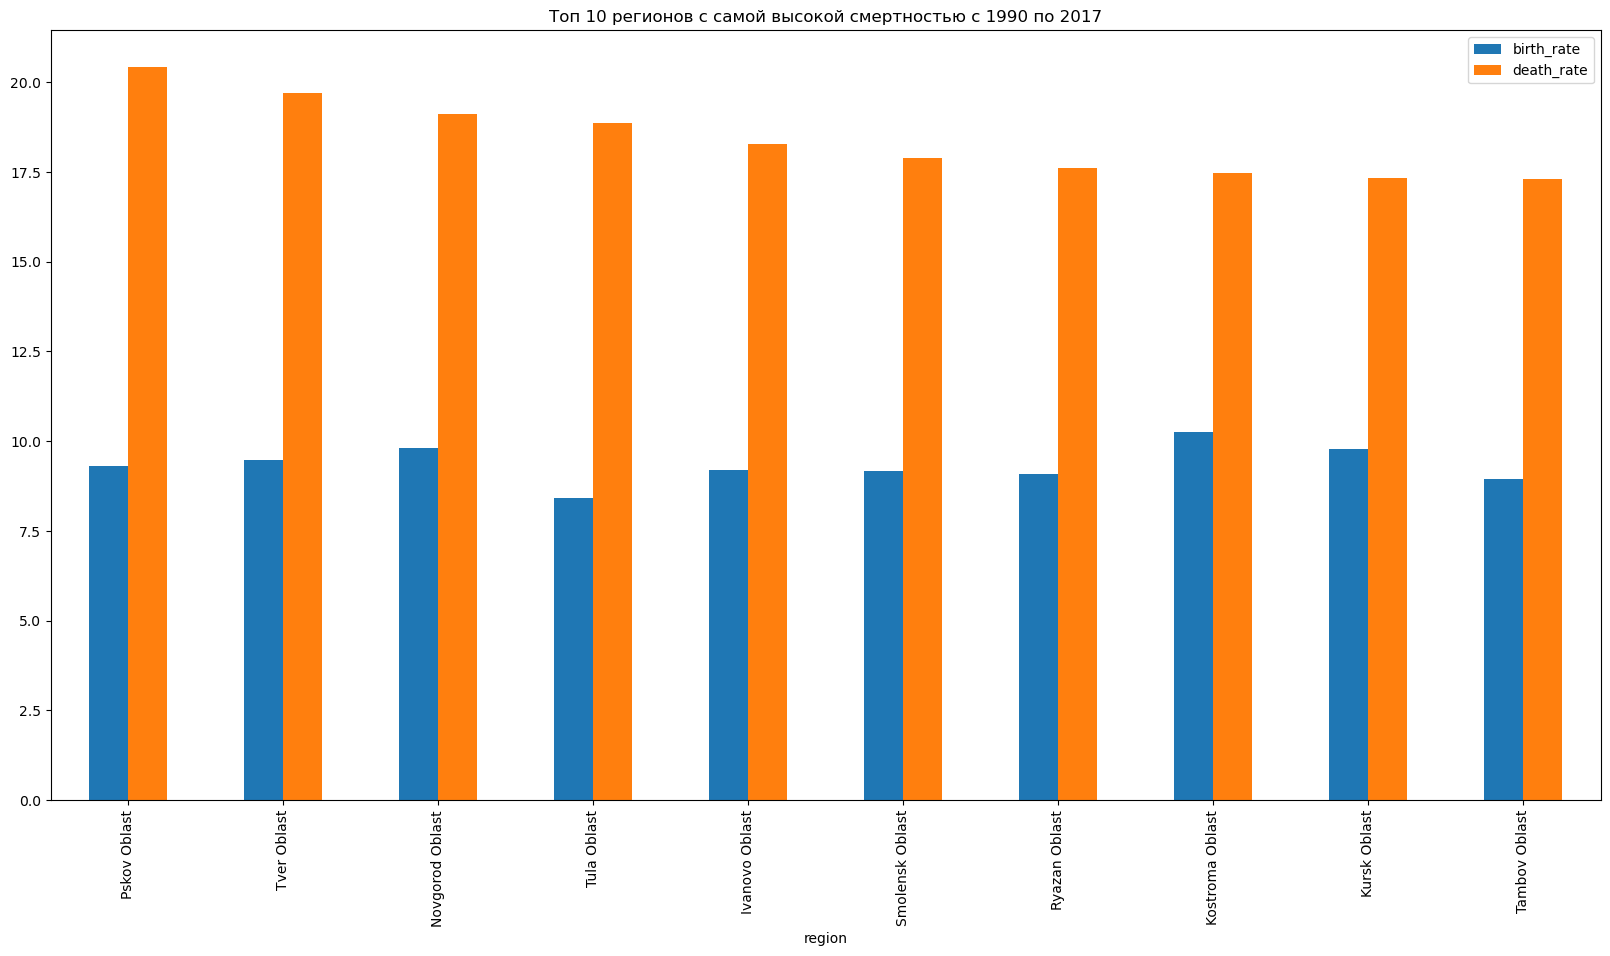

In [18]:
dataTopDeatch.plot.bar(figsize=(20,10),title='Топ 10 регионов с самой высокой смертностью с 1990 по 2017')

<AxesSubplot:xlabel='region'>

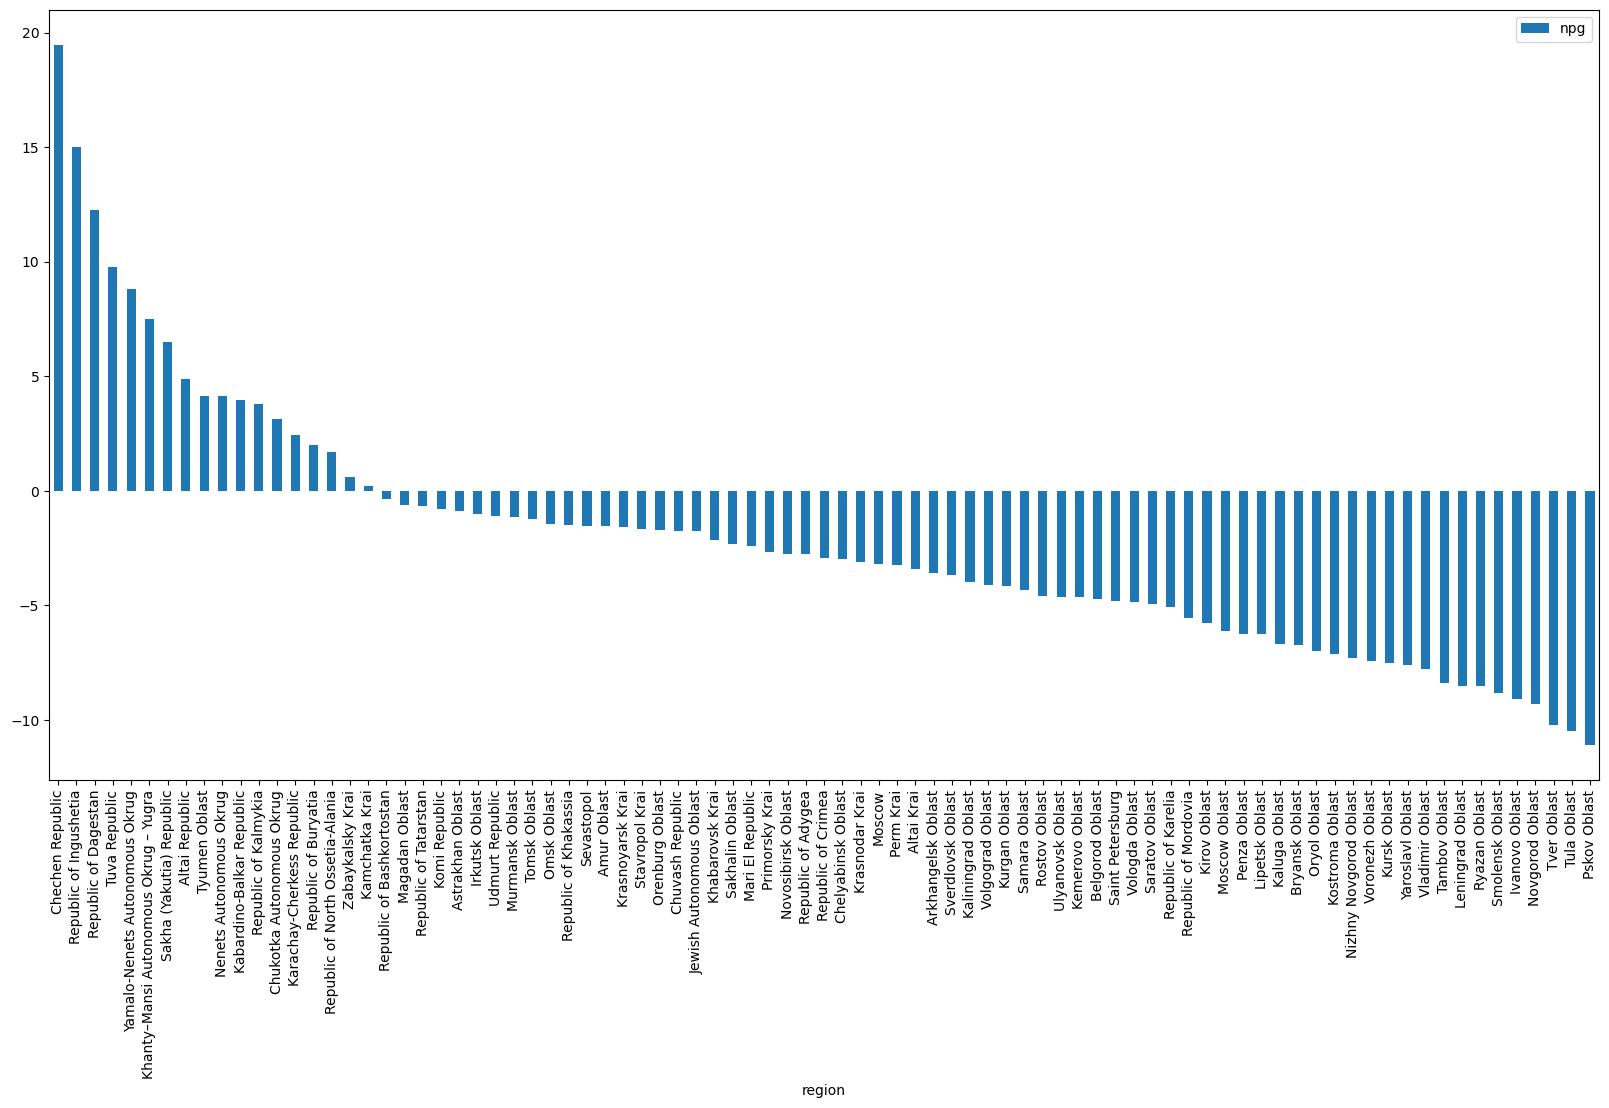

In [19]:
data.groupby(['region']).agg({'npg':'mean'}).sort_values(by='npg',ascending=False).plot.bar(figsize=(20,10))


In [22]:
Как видим, прирост населения больше всего наблюдалось в Чечне, Ингушетии и Дагестане,
и, наоборот, наибольшая убыль наблюдалась в Тверской, Тульской и Псковской областях.

SyntaxError: invalid syntax (201250184.py, line 1)

<AxesSubplot:>

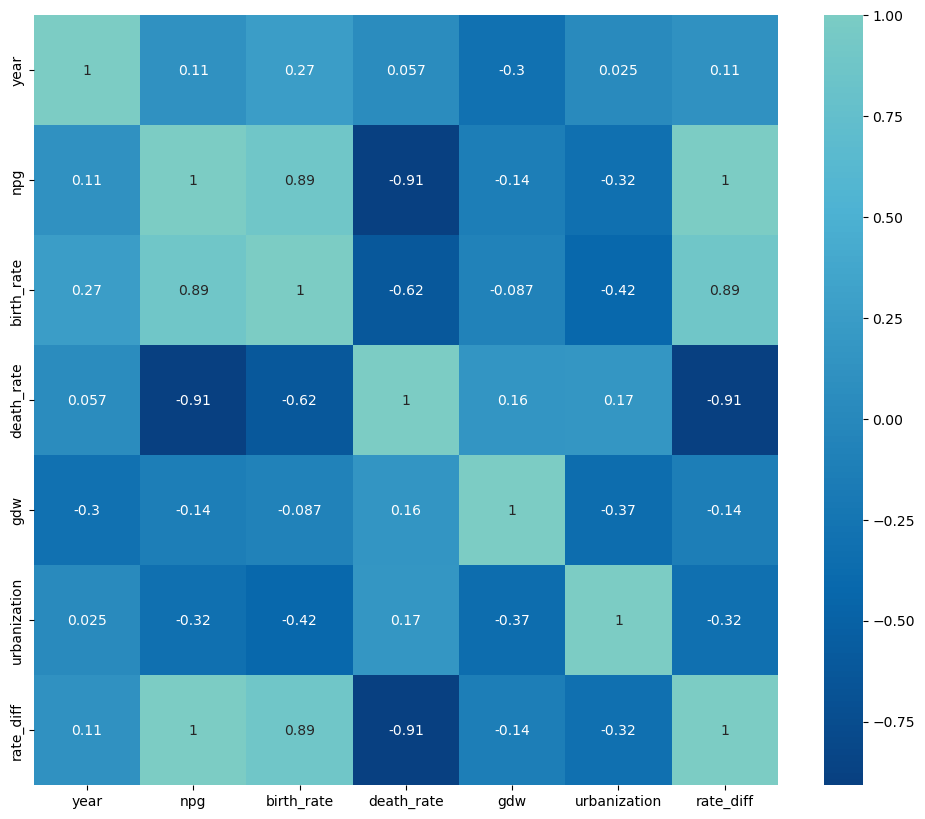

In [21]:
correlations = data.corr()

fig = plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='GnBu_r', center=1)